In [2]:
%matplotlib inline

import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
rating_file_path = "ratings.dat"
movie_file_path = "movies.dat"
user_file_path = "users.dat"

rating_data = pd.io.parsers.read_csv(rating_file_path, names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::', encoding = 'ISO-8859-1')
movie_data = pd.io.parsers.read_csv(movie_file_path, names=['movie_id', 'title', 'genre'], delimiter='::', encoding = 'ISO-8859-1')
user_data = pd.io.parsers.read_csv(user_file_path, names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::', encoding = 'ISO-8859-1')

In [7]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
print(rating_data.isnull().sum())
print(movie_data.isnull().sum())
print(user_data.isnull().sum())

user_id     0
movie_id    0
rating      0
time        0
dtype: int64
movie_id    0
title       0
genre       0
dtype: int64
user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64


## 데이터 분석

In [31]:
print('total movie count : ', len(movie_data['movie_id'].unique()))

total movie count :  3883


1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64
1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64


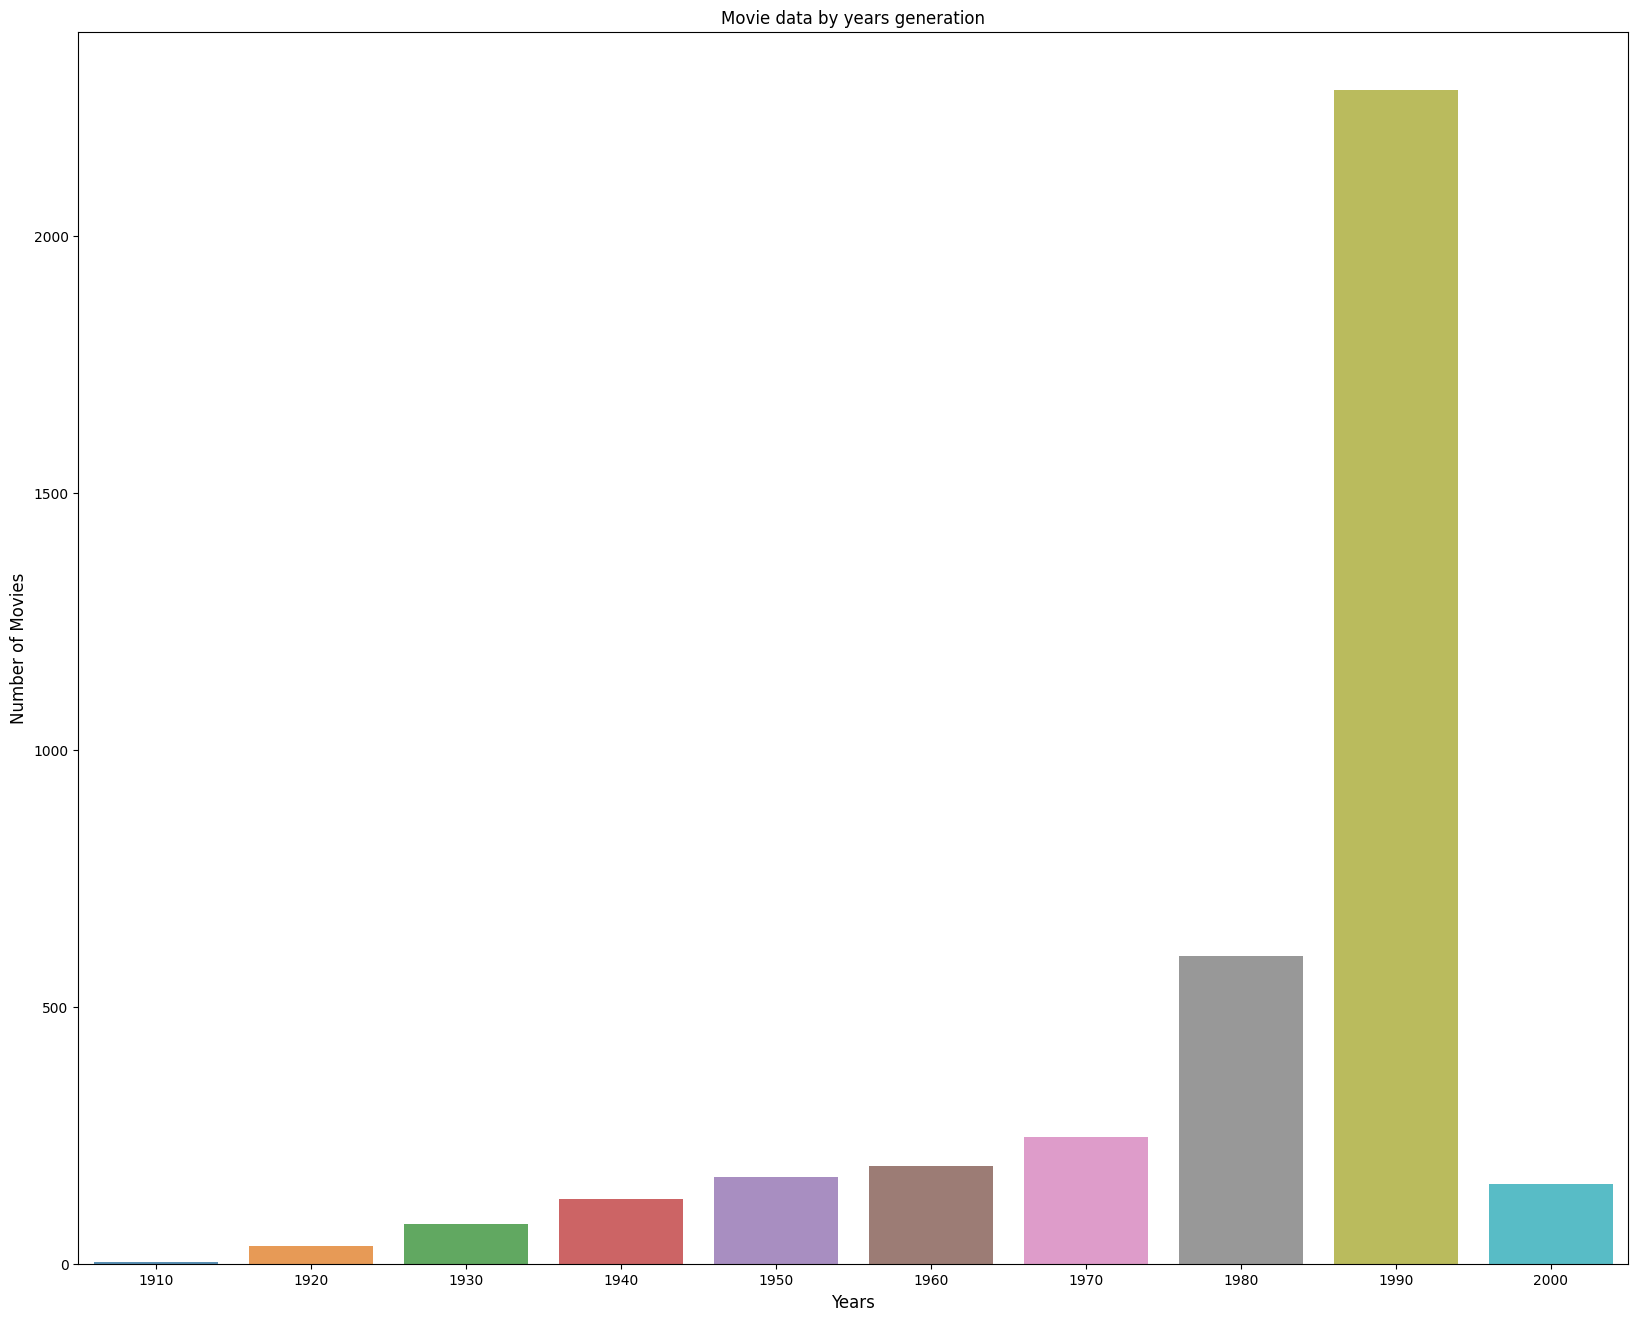

In [32]:
# 연대별 영화의 개수
movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1]) # 년도
print(movie_data['year'].value_counts().head(10))

movie_data['year_term'] = movie_data['title'].apply(lambda x: x[-5:-2]+"0")
movie_year_term = movie_data['year_term'].value_counts().sort_index()
print(movie_year_term)

sns.barplot(x=movie_year_term.index,y=movie_year_term.values, alpha=0.8)
plt.title('Movie data by years generation')
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.show()

{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


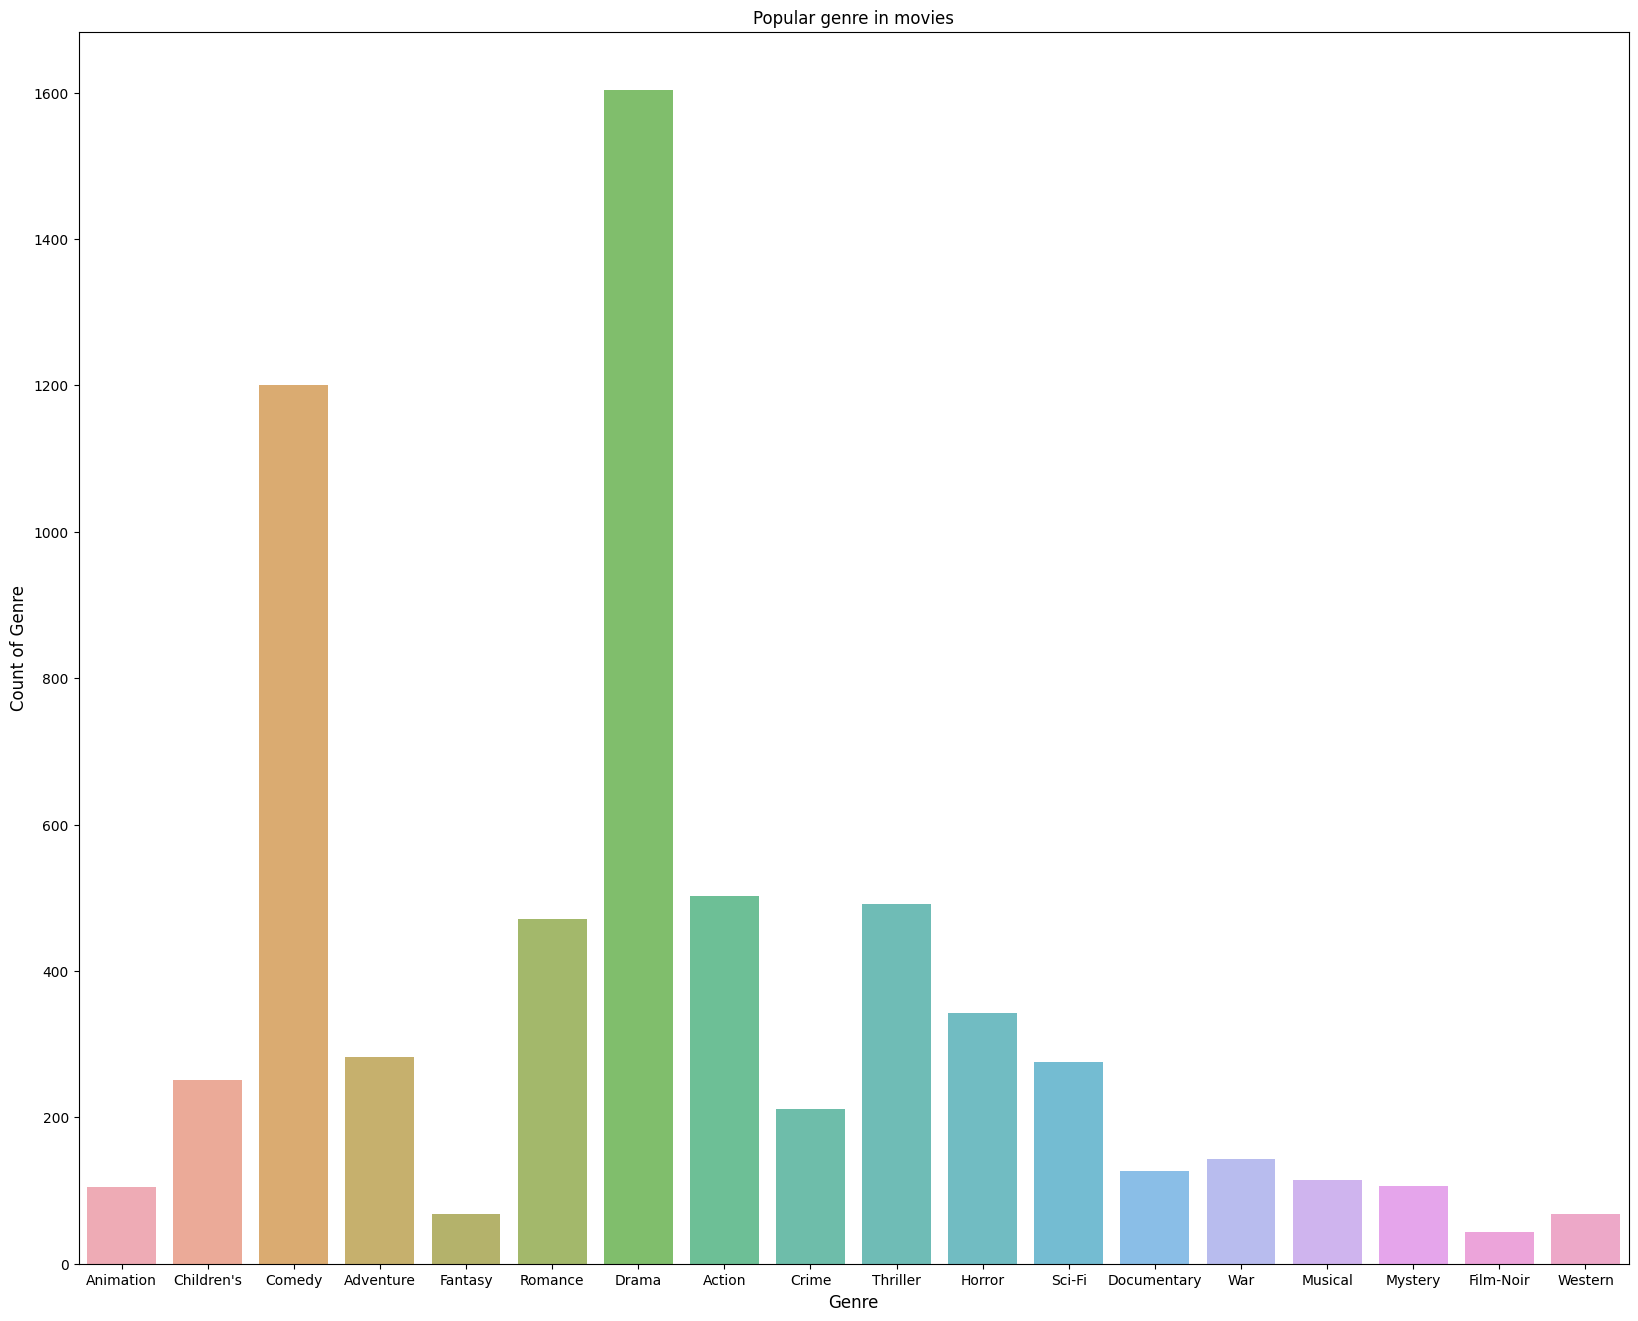

In [33]:
# 가장 많이 사용된 장르
movie_data['genre'].value_counts()[:10]

unique_genre_dict = {}
for index, row in movie_data.iterrows():
    genre_combination = row['genre']
    parsed_genre = genre_combination.split('|')
    
    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1
            
print(unique_genre_dict)
plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(x = list(unique_genre_dict.keys()), y =list(unique_genre_dict.values()), alpha=0.8)
plt.title('Popular genre in movies')
plt.ylabel('Count of Genre', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()            

In [34]:
print('total user count: ', len(user_data['user_id'].unique()))

total user count:  6040


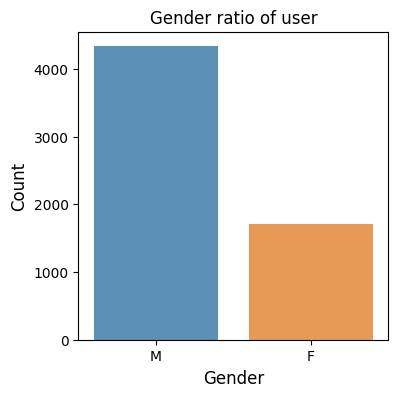

In [35]:
# 사용자 성별
plt.rcParams['figure.figsize'] = [4, 4]
user_gender = user_data['gender'].value_counts()
sns.barplot(x = user_gender.index, y = user_gender.values, alpha=0.8)
plt.title('Gender ratio of user')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64


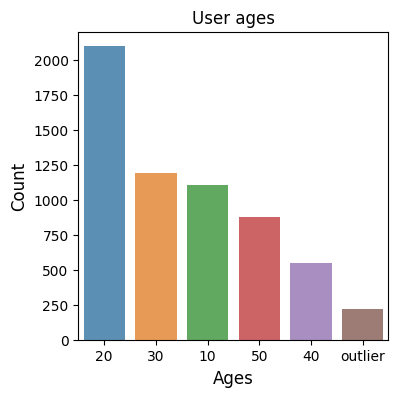

In [38]:
# 사용자 연령
print(user_data['age'].value_counts())

def age_classification(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0] + "0"
user_data['ages'] = user_data['age'].apply(lambda x: age_classification(x))
user_ages = user_data['ages'].value_counts()

sns.barplot(x = user_ages.index, y = user_ages.values, alpha=0.8)
plt.title('User ages')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Ages', fontsize=12)
plt.show()

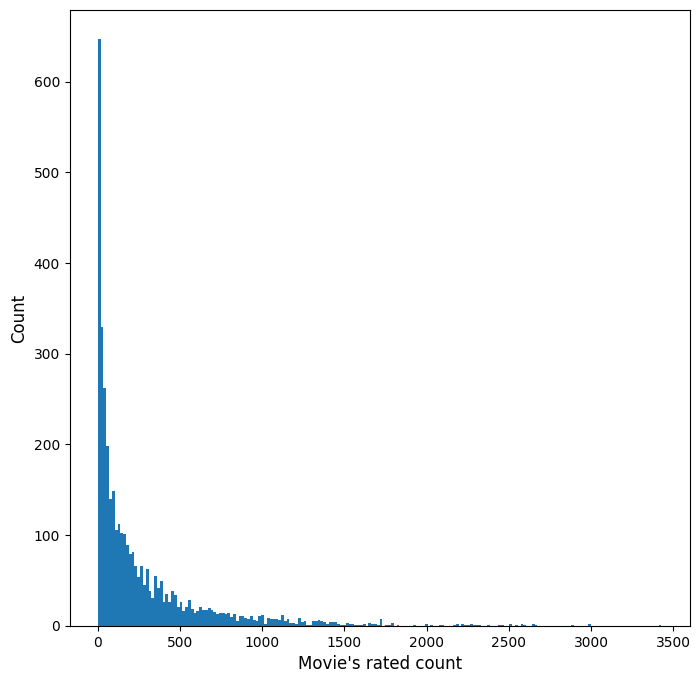

total movie count:  3883
total rated movie below 100:  1687


In [40]:
# 각 영화의 평가받은 횟수
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values

plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.hist(movie_rate_count, bins=200)
plt.ylabel('Count', fontsize=12)
plt.xlabel("Movie's rated count", fontsize=12)
plt.show()

print('total movie count: ', len(movie_data['movie_id'].unique()))
print('total rated movie below 100: ', len(movie_rate_count[movie_rate_count < 100]))

          rated_count  rating_mean
movie_id                          
1                2077     4.146846
2                 701     3.201141
3                 478     3.016736
4                 170     2.729412
5                 296     3.006757


<AxesSubplot: >

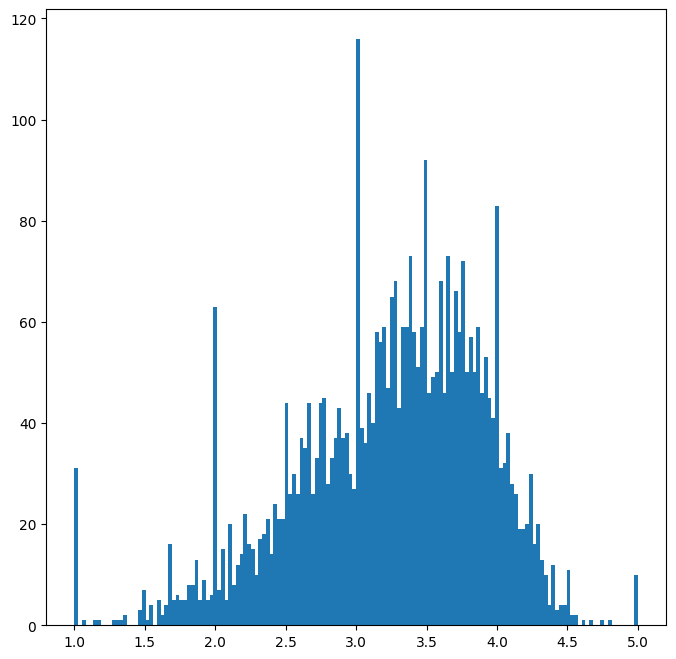

In [44]:
# 영화별 평균 평점
movie_grouped_rating_info = rating_data.groupby('movie_id')['rating'].agg(['count', 'mean'])
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']
print(movie_grouped_rating_info.head())

movie_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

In [45]:
# 100번 이상 평가 받은 영화중 평점이 높은 영화 10개를 뽑음
merged_data = movie_grouped_rating_info.merge(movie_data, on=['movie_id'], how='left')
merged_data[merged_data['rated_count'] > 100][['rating_mean', 'title']].nlargest(10, 'rating_mean')

,rating_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


In [47]:
# 유저별 영화 평가
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(['count', 'mean', 'std'])
user_grouped_rating_info.columns = ['rated_count', 'rating_mean', 'rating_std']
user_grouped_rating_info.head()

,rated_count,rating_mean,rating_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699


<AxesSubplot: >

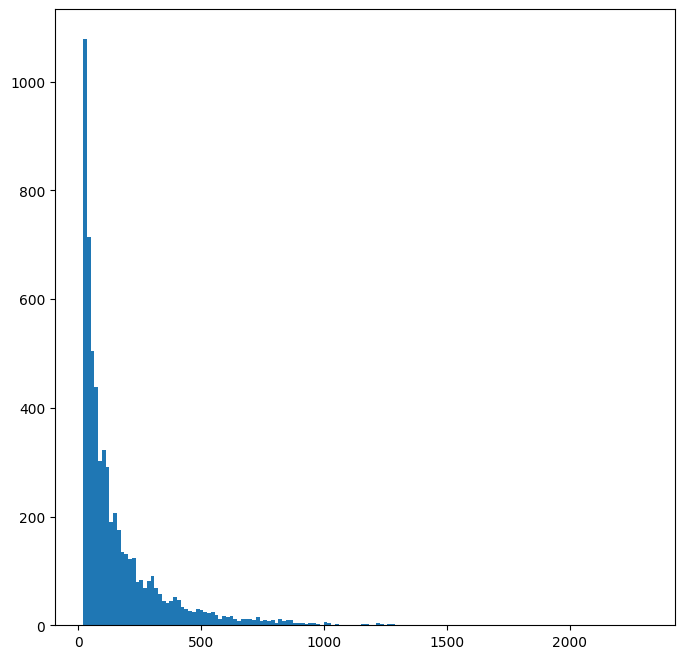

In [48]:
# 사용자 별로 평가한 영화 개수의 분포
user_grouped_rating_info['rated_count'].hist(bins=150, grid=False)

<AxesSubplot: >

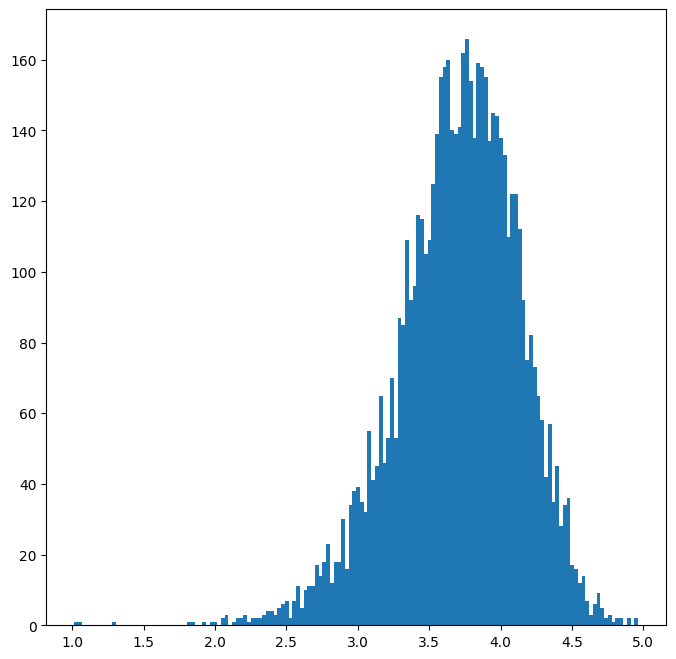

In [49]:
# 사용자 별로 평가한 영화 점수 평균의 분포
user_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

In [50]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [51]:
rating_table = rating_data[['user_id', 'movie_id', 'rating']].set_index(['user_id', 'movie_id']).unstack()
rating_table.head(10)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6           4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
7           NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
8           4.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
9           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10          5.0  5.0  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9         NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  
10        NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  

[10 rows x 3706 columns]

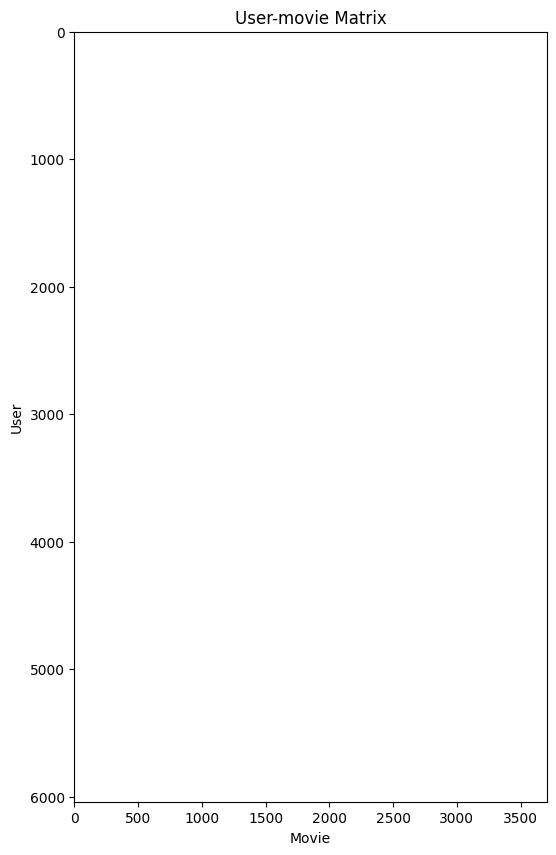

In [52]:
# user-movie 테이블 시각화
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel("Movie")
plt.ylabel("User")
plt.title("User-movie Matrix")
plt.show()

## 수학적 기법을 활용한 평점 예측

In [53]:
!pip install surprise

     -------------------------------------- 772.0/772.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-win_amd64.whl size=1130457 sha256=59a1743e710700ed433ab8ff79894a061c5f9625cd77ac106cf6ff1de2688aaa
  Stored in directory: c:\users\csjty\appdata\local\pip\cache\wheels\10\bc\66\1e588b3f2aedb617b1bedc0f24981c917c95246a020c7c1975
Successfully built scikit-surprise


In [61]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# 빈칸을 포함한 user-item 행렬 생성
np.set_printoptions(suppress=True)

reader = Reader(rating_scale=(1, 5))

# 데이터 프레임 생성
ratings_dict = {'item_id': [1, 2, 3, 1, 2, 3, 2], 'user_id': ['a', 'a', 'a', 'b', 'b', 'b', 'c'], 'rating': [2, 4, 4, 2, 5, 4, 5]}
df = pd.DataFrame(ratings_dict)
display(df.head())

# 데이터 프레임을 행렬로 변환하여 확인
df_matrix_table = df[['user_id', 'item_id', 'rating']].set_index(['user_id', 'item_id']).unstack().fillna(0)
df_matrix_table.head(10)

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5


rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          0.0  5.0  0.0

### SVD를 이용한 빈칸 채우기 학습

In [62]:
# SVD 사용을 위한 데이터셋을 생성
data = Dataset.load_from_df(df=df[['user_id', 'item_id', 'rating']], reader=reader)
train_data = data.build_full_trainset()

model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=10)
model.fit(train_data)

In [66]:
# 학습한 모델 기반으로 빈공간의 점수를 예측
"""
학습에 사용된 행렬에서 0으로 평가된(rating: 0) 부분의 데이터
user 혹은 item은 학습에 반드시 등장한 적이 있어야 한다는 전제조건을 통해 추출
"""

test_data = train_data.build_anti_testset()
predictions = model.test(test_data)

# 빈공간(test_data)의 점수를 예측한 결과
for _, iid, _, predicted_rating, _ in predictions:
    print(f'item_id: {iid} | predicted rating: {predicted_rating}')
    
test_data = train_data.build_anti_testset()
predictions = model.test(test_data)

# 원래부터 비어있지 않았던 행렬의 값들을 출력한 것, real_rating은 원래값, predicted_rating은 행렬 완성 후 예측된 값
for _, iid, r_ui, predicted_rating, _ in predictions:
    print(f'item_id: {iid} | real rating: {r_ui} | predicted rating: {predicted_rating}')


item_id: 1 | predicted rating: 3.60759290655706
item_id: 3 | predicted rating: 3.7924310563311185
item_id: 1 | real rating: 3.7142857142857144 | predicted rating: 3.60759290655706
item_id: 3 | real rating: 3.7142857142857144 | predicted rating: 3.7924310563311185


## 아직 평가하지 않은 영화의 점수 예측하기

In [68]:
# Movie_Lens 데이터에 SVD 적용하기
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data = data.build_full_trainset()

# SVD 모델을 학습
train_start = time.time()
model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=100)
model.fit(train_data)
train_end = time.time()
print('train time of model: %.2f seconds' % (train_end - train_start))

train time of model: 31.97 seconds


In [72]:
# 영화 점수를 예측할 타겟 유저 선정
# user id가 4인 유저의 영화 평가 데이터
target_user_id = 4
target_user_data = rating_data[rating_data['user_id']==target_user_id]
display(target_user_data.head())

# user_id가 4인 유저가 평가한 영화 히스토리 정보를 추출
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
    
print(target_user_movie_rating_dict)

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


In [ ]:
# 타겟 유저가 보지않은 영화 중 예상 평점이 높은 10개 선정
# 타겟 유저(user_id가 4인 유저)가 보지 않은 영화 정보를 테스트 데이터로 생성
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))

# 타겟 유저의 평점 점수를 예측
target_user_predictions = model.test(test_data)

# 예측된 점수 중 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions, user_id=target_user_id, user_history=target_user_movie_rating_dict)

# target_user_movie_predict_dict에서 Top 10
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]
print(target_user_top10_predicted)

# 타이틀 정보로 출력하기 위해 movie_id마다 movie_title을 딕셔너리 형태로 저장
movie_dict = {}
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title

# 앞서 계산한 Top 10 영화에 movie_title을 매핑
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], ":", predicted_rating)
print()

# 타겟 유저의 기존 선호 영화와 비교
target_user_top10_real = sorted(target_user_movie_rating_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]

for real in target_user_top10_real:
    movie_id = real[0]
    real_rating = real[1]
    print(movie_dict[movie_id], ':', real_rating)


In [ ]:
# 예측한 모델 평가
# RMSE 계산
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성 학습 데이터와 
